In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from PIL import Image

# 使用 PIL 库加载图像数据并转化为 numpy 数组
p_sar = Image.open('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/P-DOM/2_1.tif')
opt = Image.open('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/Optical-DOM/2_1.tif')

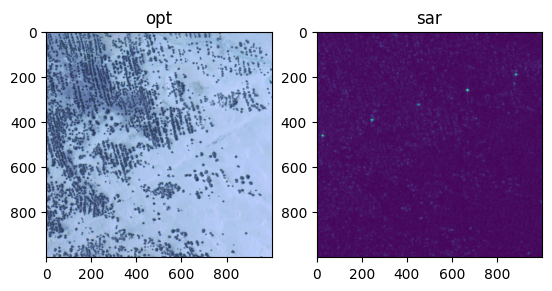

In [2]:
plt.subplot(121)
plt.imshow(opt)
plt.title('opt')

# 对图像进行高斯滤波
# sigma = 15.0
# img_filtered = gaussian_filter(img_normalized, sigma=sigma)

# 绘制经过高斯滤波后的热力图
plt.subplot(122)
plt.imshow(p_sar)
plt.title(f'sar')

# 显示图像
plt.show()

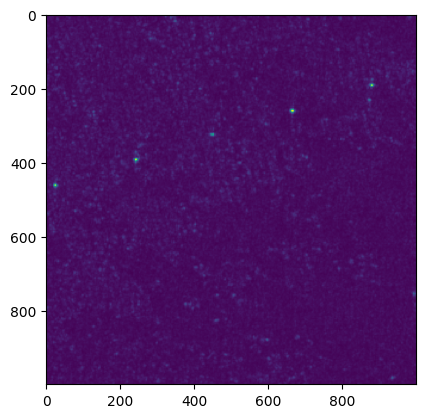

In [3]:
plt.imshow(p_sar)

In [4]:
np.max(p_sar)

65535

In [5]:
# 计算灰度值分布
hist, bin_edges = np.histogram(img, bins=256, range=(0, 65535))

# 将灰度值分布转化为热力图
heatmap = np.zeros((256, 1))
for i in range(256):
    heatmap[i, 0] = hist[i]

# 进行平滑处理
smoothed_heatmap = gaussian_filter(heatmap, sigma=5)

# 绘制热力图
plt.imshow(smoothed_heatmap, cmap='hot', aspect='auto')
plt.colorbar()
plt.show()

NameError: name 'img' is not defined

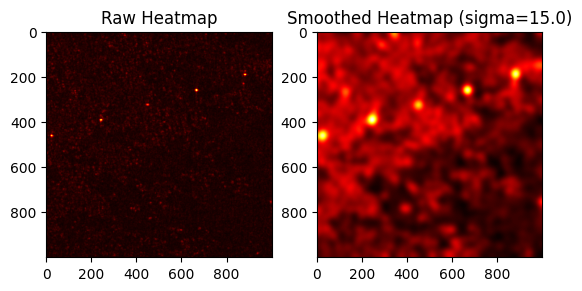

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

img = np.array(Image.open('/mnt/e/datasets/YIN-DL-TEST/pac_dataset/P-DOM/2_1.tif'))

# 将灰度图像的像素值缩放到 [0, 1] 的范围内
img_normalized = img / np.max(img)

# 绘制未经过滤的热力图
plt.subplot(121)
plt.imshow(img_normalized, cmap='hot')
plt.title('Raw Heatmap')

# 对图像进行高斯滤波
sigma = 15.0
img_filtered = gaussian_filter(img_normalized, sigma=sigma)

# 绘制经过高斯滤波后的热力图
plt.subplot(122)
plt.imshow(img_filtered, cmap='hot')
plt.title(f'Smoothed Heatmap (sigma={sigma})')

# 显示图像
plt.show()


In [7]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter

def generate_heatmap(img, center_size=100, smoothing_sigma=50):
    # 计算灰度值分布
    hist, bin_edges = np.histogram(img, bins=256, range=(0, 255))

    # 将灰度值分布转化为热力图
    heatmap = np.zeros((256, 256))
    for i in range(256):
        heatmap[i, :] = hist[i]

    # 对热力图进行中心区域平滑处理
    center = np.zeros((center_size, center_size))
    center[int(center_size/2), int(center_size/2)] = 1
    smoothed_center = gaussian_filter(center, sigma=smoothing_sigma)
    heatmap[:center_size, :center_size] = heatmap[:center_size, :center_size] * smoothed_center

    # 将热力图缩小到与原图像相同大小
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

    # 归一化热力图并转化为颜色图像
    heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX)
    heatmap = cv2.applyColorMap(heatmap.astype(np.uint8), cv2.COLORMAP_JET)
    
    print(heatmap.shape)
    print(img.shape)
    # 将热力图与原图像混合
#     output = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)

    return heatmap


In [8]:
# 读取输入图像
img = cv2.imread('/mnt/e/datasets/YIN-DL-TEST/pac_dataset/P-DOM/2_1.tif', cv2.IMREAD_GRAYSCALE)
img_normalized = img * 255 / np.max(img)
img_normalized.shape

(1000, 1000)

(1000, 1000, 3)
(1000, 1000)


Text(0.5, 1.0, 'Raw Heatmap')

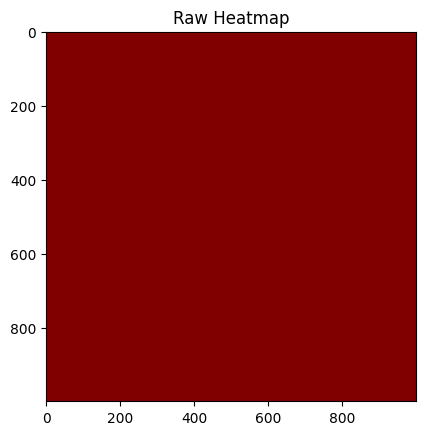

In [9]:
# 生成热力图并显示
heatmap = generate_heatmap(img_normalized, center_size=1, smoothing_sigma=3)
plt.imshow(heatmap, cmap='hot')
plt.title('Raw Heatmap')


Text(0.5, 1.0, 'Raw Heatmap')

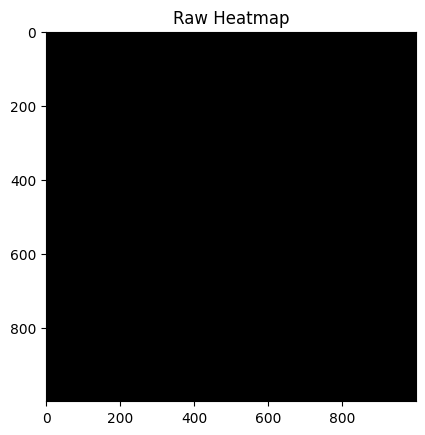

In [10]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def generate_heatmap(img, center_size=10, smoothing_sigma=50, num_points=10):
    """
    生成热力图

    :param img: 输入灰度图像
    :param center_size: 代表需要寻找的局部最大值区域的大小
    :param smoothing_sigma: 控制高斯平滑的标准差
    :param num_points: 需要寻找的局部最大值个数
    :return: 热力图
    """
    # 对输入图像进行高斯平滑
    img_smooth = cv2.GaussianBlur(img, (smoothing_sigma, smoothing_sigma), 0)

    # 寻找局部最大值
    heatmap = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.float32)
    for i in range(num_points):
        max_val, _, max_loc, _ = cv2.minMaxLoc(img_smooth)
        if max_val <= 0:
            break
        heatmap[max_loc[1], max_loc[0], :] = [0, 0, max_val]
        cv2.circle(img_smooth, max_loc, center_size, (0, 0, 0), -1)

    # 对热力图进行高斯平滑
    heatmap = cv2.GaussianBlur(heatmap, (smoothing_sigma, smoothing_sigma), 0)

#     # 将热力图与原图像混合
#     output = cv2.addWeighted(img, 0.5, heatmap, 0.5, 0)
    
    return heatmap


# 读取图像并生成热力图
img = cv2.imread('/mnt/e/datasets/YIN-DL-TEST/pac_dataset/P-DOM/2_1.tif', cv2.IMREAD_GRAYSCALE)
img_normalized = img * 255 / np.max(img)
heatmap = generate_heatmap(img_normalized, center_size=50, smoothing_sigma=5)

# 显示图像
plt.imshow(heatmap, cmap='hot')
plt.title('Raw Heatmap')


In [11]:
import cv2
import numpy as np

def generate_heatmap(img, opt, threshold=None, center_size=50, smoothing_sigma=50):
    # 计算阈值
    if threshold is None:
        threshold = np.median(img) * 2

    # 将图像转换为三通道图像
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # 生成热力图
    heatmap = np.zeros_like(img_color)
    heatmap[img_color > threshold] = (img_color[img_color > threshold] - threshold) * 255 / (img_color.max() - threshold)
    heatmap = heatmap[:, :, 0]

    # 获取局部最大值
    heatmap_max = cv2.dilate(heatmap, np.ones((5,5),np.uint8))
    heatmap_mask = np.uint8(heatmap == heatmap_max)
    heatmap_mask = cv2.dilate(heatmap_mask, np.ones((5,5),np.uint8))
    heatmap_mask = cv2.erode(heatmap_mask, np.ones((5,5),np.uint8))
    heatmap_mask = cv2.dilate(heatmap_mask, np.ones((5,5),np.uint8))
    heatmap_max = heatmap * heatmap_mask

    # 绘制圆圈
    heatmap_color = cv2.applyColorMap(np.uint8(heatmap_max), cv2.COLORMAP_JET)
    circles = cv2.HoughCircles(np.uint8(heatmap_max), cv2.HOUGH_GRADIENT, 1, minDist=center_size, param1=50, param2=20, minRadius=0, maxRadius=center_size)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0,:]:
            cv2.circle(heatmap_color,(i[0],i[1]),i[2],(0,0,255),-1)

    # 高斯平滑
    heatmap_color = cv2.GaussianBlur(heatmap_color, (smoothing_sigma, smoothing_sigma), 0)
    output = cv2.addWeighted(opt, 0.7, heatmap_color, 0.3, 0)

    return output


In [12]:
import cv2
import numpy as np

def generate_heatmap(img, threshold=None, center_size=6, smoothing_sigma=70, radius=12):
    # 计算阈值
    if threshold is None:
        threshold = np.median(img) * 2

    # 将图像转换为三通道图像
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    # 生成热力图
    heatmap = np.zeros_like(img_color, dtype=np.float64)
    heatmap[img_color > threshold] = (img_color[img_color > threshold] - threshold) * 255 / (img_color.max() - threshold)
    heatmap = heatmap[:, :, 0]
    print(f'heatmap size is {heatmap.shape}')
    # 加权平均
    h, w = heatmap.shape
    for y in range(h):
        for x in range(w):
            if heatmap[y, x] > 0:
                gaussian_kernel = cv2.getGaussianKernel(2*radius, smoothing_sigma)
                print(heatmap[y-radius:y+radius, x-radius:x+radius].shape)
                print(heatmap[y, x].shape)
                print(gaussian_kernel.T.shape)
                print((heatmap[y, x] * gaussian_kernel * gaussian_kernel.T).shape)
                heatmap[y-radius:y+radius, x-radius:x+radius] += heatmap[y, x] * gaussian_kernel * gaussian_kernel.T

    # 高斯平滑
    heatmap = cv2.GaussianBlur(heatmap, (smoothing_sigma, smoothing_sigma), 0)

    # 映射到色彩图
    heatmap_color = cv2.applyColorMap(np.uint8(heatmap), cv2.COLORMAP_JET)

    return heatmap_color


In [13]:
import cv2
import numpy as np
def normalize_img(img):
    img_normalized = img.astype(np.float32) / 255.0
    img_normalized -= np.min(img_normalized)
    img_normalized /= np.max(img_normalized)
    return img_normalized
def generate_heatmap(img, threshold=0.5, center_size=5, smoothing_sigma=35, radius=0.1):
    img_normalized = normalize_img(img)
#     threshold = np.median(img_normalized) * 2
    print(threshold)
    heatmap = cv2.applyColorMap((img_normalized * 255).astype(np.uint8), cv2.COLORMAP_JET)
    heatmap = heatmap[:, :, 0].astype(np.float32) / 255.0

    heatmap[heatmap < threshold] = 0
    heatmap[heatmap >= threshold] = 1

    center_x, center_y = np.unravel_index(np.argmax(heatmap), heatmap.shape)
    center = np.zeros_like(heatmap)
    center[center_x, center_y] = center_size

    heatmap = cv2.GaussianBlur(heatmap, (0, 0), smoothing_sigma)
    heatmap += center * cv2.getGaussianKernel(max(img.shape), radius * img.shape[0])

    return 1 - heatmap


0.5


Text(0.5, 1.0, 'Raw Heatmap')

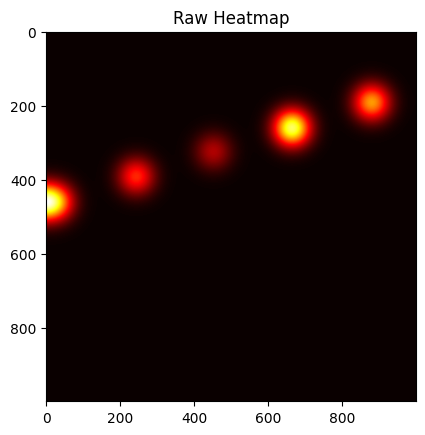

In [14]:
# 读取图像并生成热力图
img = cv2.imread('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/P-DOM/2_1.tif', cv2.IMREAD_GRAYSCALE)
opt = cv2.imread('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/Optical-DOM/2_1.tif')
img_normalized = img * 255 / np.max(img)
heatmap = generate_heatmap(img)

# 显示图像
plt.imshow(heatmap, cmap='hot')
plt.title('Raw Heatmap')


In [23]:
heatmap.max()

0.011056364

In [24]:
heatmap.min()

1.1920929e-07

Text(0.5, 1.0, 'Raw Heatmap')

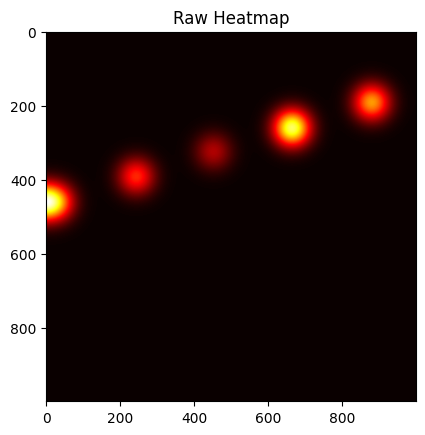

In [25]:
standardized_array = (heatmap - heatmap.mean()) / heatmap.std()
# 显示图像
plt.imshow(standardized_array, cmap='hot')
plt.title('Raw Heatmap')


Text(0.5, 1.0, 'min_max_normalized_array Heatmap')

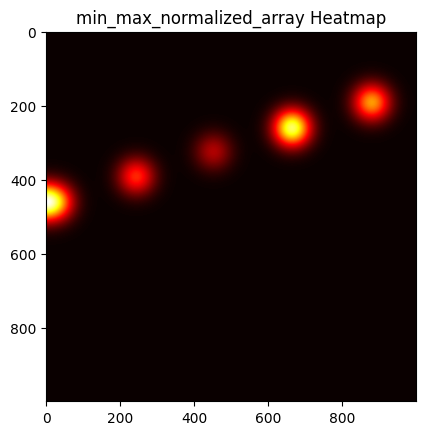

In [26]:
min_max_normalized_array = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
# 显示图像
plt.imshow(min_max_normalized_array, cmap='hot')
plt.title('min_max_normalized_array Heatmap')

In [47]:
test = torch.from_numpy(min_max_normalized_array)

In [52]:
test = torch.unsqueeze(test, dim=0)

In [66]:
max_idx = torch.argmax(test)
x_idx, y_idx = max_idx % test.shape[1], max_idx // test.shape[1]
print(f'x{x_idx}, y{y_idx}')
print(test[0, y_idx, x_idx])

x0, y461
tensor(1.)


In [ ]:
min_max_normalized_array[450,0]

In [ ]:
min_max_normalized_array.min()

In [ ]:
min_max_normalized_array.max()

Text(0.5, 1.0, 'Raw Heatmap')

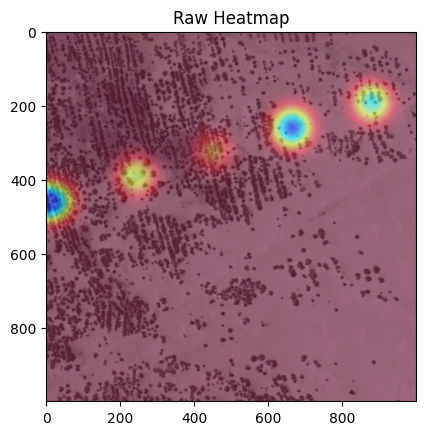

In [27]:
# 将热力图转换为伪彩色图
# heat = np.uint8(255 * min_max_normalized_array / np.max(min_max_normalized_array))
heat = np.uint8(255*min_max_normalized_array)
heatmap_color = cv2.applyColorMap(heat, cv2.COLORMAP_JET)
# 调整热力图尺寸以匹配RGB图像的尺寸
heatmap_resized = cv2.resize(heatmap_color, (opt.shape[1], opt.shape[0]))

# 将热力图与RGB图像叠加
result = cv2.addWeighted(opt, 0.5, heatmap_resized, 0.5, 0)
# 显示图像
plt.imshow(result)
plt.title('Raw Heatmap')

In [29]:
import torch
img_tensor = torch.from_numpy(min_max_normalized_array)
img_sigmoid = torch.sigmoid(img_tensor).numpy()

In [30]:
print(img_sigmoid.max())
print(img_sigmoid.min())

0.7310586
0.5


In [31]:
attention_map = np.dstack((min_max_normalized_array, min_max_normalized_array, min_max_normalized_array))

In [32]:
attention_map = (attention_map*255).astype(np.uint8)

In [33]:
attention_map.max()

255

Text(0.5, 1.0, 'Attention')

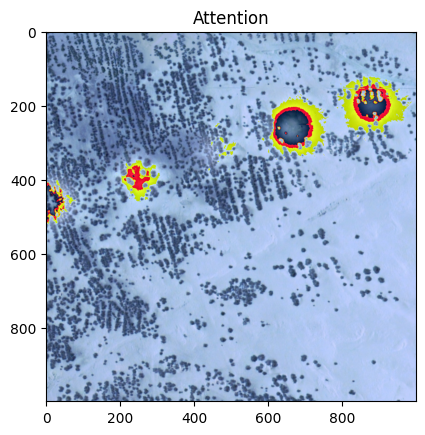

In [34]:
attention = attention_map + opt
# attention = cv2.normalize(attention, None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(attention)
plt.title('Attention')

In [35]:
attention[400,400]

array([ 59,  74, 116], dtype=uint8)

In [36]:
import timm 
model = timm.create_model('swsl_resnet18', features_only=True, output_stride=32,
                                          out_indices=(1, 2, 3, 4), pretrained=True)
conv = torch.nn.Conv2d(1, 1, kernel_size=3, stride=2, padding=1)
avg_pool = torch.nn.AvgPool2d(kernel_size=2, stride=2)

In [37]:
input_np = np.transpose(heatmap_resized, (2, 0, 1)).astype(np.float32)
input_tensor = torch.from_numpy(input_np[np.newaxis, ...])
input_tensor.shape

torch.Size([1, 3, 1000, 1000])

In [38]:
res1, res2, res3, res4 = model(input_tensor)

/home/wdblink/anaconda3/envs/Transfer-Learning-Library/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [39]:
res3.shape

torch.Size([1, 256, 63, 63])

Text(0.5, 1.0, 'Feature Heatmap')

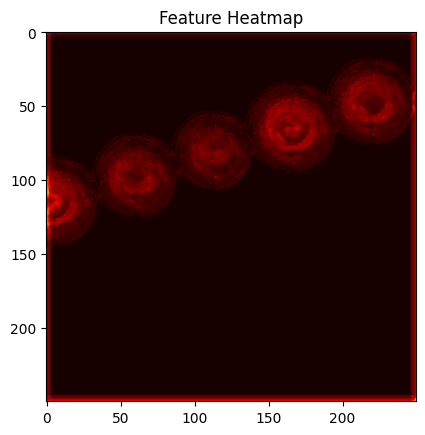

In [40]:
vis_np = res1.sum(dim=1, keepdim=True).detach().numpy()
vis = np.squeeze(vis_np, axis=(0, 1))
plt.imshow(vis, cmap='hot')
plt.title('Feature Heatmap')

0.5


Text(0.5, 1.0, 'Raw Heatmap')

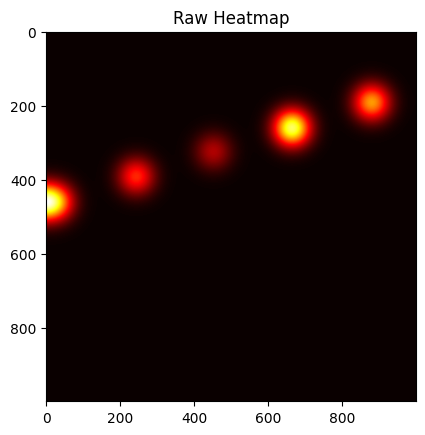

In [18]:
# 读取图像并生成热力图
opt = np.array(Image.open('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/Optical-DOM/2_1.tif').convert('RGB'))
sar = np.array(Image.open('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/P-DOM/2_1.tif'))
img_normalized = sar * 255 / np.max(sar)
heatmap = generate_heatmap(sar)

# 显示图像
plt.imshow(heatmap, cmap='hot')
plt.title('Raw Heatmap')

In [41]:
a = Image.open('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/Optical-DOM/2_1.tif').convert('RGB')
b = Image.open('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/P-DOM/2_1.tif')
np.array(a).shape

(1000, 1000, 3)

In [42]:
min_max_normalized_array = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
np.max(min_max_normalized_array)

1.0

In [43]:
attention_tensor = torch.from_numpy(min_max_normalized_array[np.newaxis, np.newaxis, ...].astype(np.float32))

In [44]:
down_sampling = avg_pool(attention_tensor)
down_sampling = avg_pool(down_sampling)
down_sampling = avg_pool(down_sampling)
down_sampling = avg_pool(down_sampling)
down_sampling = avg_pool(down_sampling)
down_sampling.shape

torch.Size([1, 1, 31, 31])

Text(0.5, 1.0, 'Feature Heatmap')

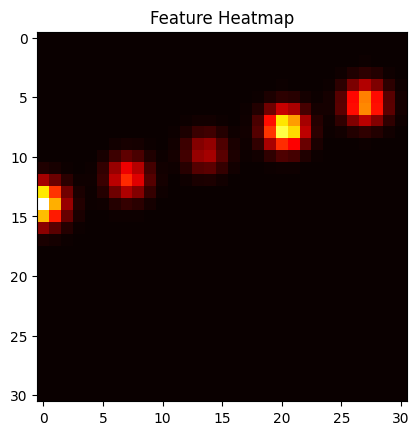

In [45]:
vis = np.squeeze(down_sampling.detach().numpy(), axis=(0, 1))
plt.imshow(vis, cmap='hot')
plt.title('Feature Heatmap')

In [15]:
import numbers
import random
class SmartCropV3(object):
    def __init__(self, crop_size=512,
                 max_ratio=0.75,
                 ignore_index=12, nopad=False):
        self.crop_size = crop_size
        self.max_ratio = max_ratio
        self.ignore_index = ignore_index
        self.crop = RandomCrop(crop_size, ignore_index=ignore_index, nopad=nopad)

    def __call__(self, img, mask, sar):
        assert img.size == mask.size
        count = 0
        while True:
            img_crop, mask_crop, sar_crop = self.crop(img.copy(), mask.copy(), sar.copy())
            count += 1
            labels, cnt = np.unique(np.array(mask_crop), return_counts=True)
            cnt = cnt[labels != self.ignore_index]
            if len(cnt) > 1 and np.max(cnt) / np.sum(cnt) < self.max_ratio:
                break
            if count > 10:
                break

        return img_crop, mask_crop, sar_crop
    

class RandomCrop(object):
    """
    Take a random crop from the image.
    First the image or crop size may need to be adjusted if the incoming image
    is too small...
    If the image is smaller than the crop, then:
         the image is padded up to the size of the crop
         unless 'nopad', in which case the crop size is shrunk to fit the image
    A random crop is taken such that the crop fits within the image.
    If a centroid is passed in, the crop must intersect the centroid.
    """
    def __init__(self, size=512, ignore_index=12, nopad=True):

        if isinstance(size, numbers.Number):
            self.size = (int(size), int(size))
        else:
            self.size = size
        self.ignore_index = ignore_index
        self.nopad = nopad
        self.pad_color = (0, 0, 0)

    def __call__(self, img, mask, sar, centroid=None):
        assert img.size == mask.size
        w, h = img.size
        # ASSUME H, W
        th, tw = self.size
        if w == tw and h == th:
            return img, mask

        if self.nopad:
            if th > h or tw > w:
                # Instead of padding, adjust crop size to the shorter edge of image.
                shorter_side = min(w, h)
                th, tw = shorter_side, shorter_side
        else:
            # Check if we need to pad img to fit for crop_size.
            if th > h:
                pad_h = (th - h) // 2 + 1
            else:
                pad_h = 0
            if tw > w:
                pad_w = (tw - w) // 2 + 1
            else:
                pad_w = 0
            border = (pad_w, pad_h, pad_w, pad_h)
            if pad_h or pad_w:
                img = ImageOps.expand(img, border=border, fill=self.pad_color)
                mask = ImageOps.expand(mask, border=border, fill=self.ignore_index)
                w, h = img.size

        if centroid is not None:
            # Need to insure that centroid is covered by crop and that crop
            # sits fully within the image
            c_x, c_y = centroid
            max_x = w - tw
            max_y = h - th
            x1 = random.randint(c_x - tw, c_x)
            x1 = min(max_x, max(0, x1))
            y1 = random.randint(c_y - th, c_y)
            y1 = min(max_y, max(0, y1))
        else:
            if w == tw:
                x1 = 0
            else:
                x1 = random.randint(0, w - tw)
            if h == th:
                y1 = 0
            else:
                y1 = random.randint(0, h - th)
        return img.crop((x1, y1, x1 + tw, y1 + th)), sar.crop((x1, y1, x1 + tw, y1 + th)), mask.crop((x1, y1, x1 + tw, y1 + th))

In [16]:
crop_aug = SmartCropV3(crop_size=768, max_ratio=0.75, ignore_index=255, nopad=False)
ORIGIN_IMG_SIZE = (1000, 1000)
mask = Image.open('/mnt/f/Dataset/sar_wire/train/Label/2_1.png').convert('L')
opt = Image.open('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/Optical-DOM/2_1.tif').convert('RGB')
sar = Image.open('/mnt/f/datasets/YIN-DL-TEST/pac_dataset/P-DOM/2_1.tif')
mask = mask.resize(ORIGIN_IMG_SIZE)
opt = opt.resize(ORIGIN_IMG_SIZE)
sar = sar.resize(ORIGIN_IMG_SIZE)
opt, mask_croped, sar_croped = crop_aug(opt, mask, sar)

0.5


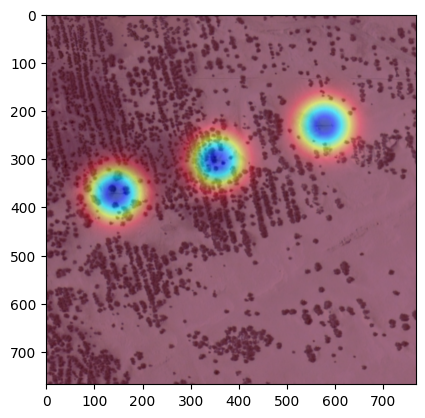

In [17]:
# 显示图像
heatmap = generate_heatmap(np.asarray(sar_croped))
min_max_normalized_array = (heatmap - heatmap.min()) / (heatmap.max() - heatmap.min())
heat = np.uint8(255*min_max_normalized_array)
heatmap_color = cv2.applyColorMap(heat, cv2.COLORMAP_JET)
heatmap = Image.fromarray(heatmap_color)
result = Image.blend(opt, heatmap, 0.5)
plt.imshow(result)

In [ ]:
x = torch.randn(2, 3, 4)
x.shape[1]